# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Data

In [2]:
test_data=pd.read_csv('../input/netflix-appetency/test.csv')
test_data.info()
train_data=pd.read_csv('../input/netflix-appetency/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 508 entries, id to feature_506
dtypes: float64(143), int64(273), object(92)
memory usage: 116.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 509 entries, id to feature_506
dtypes: float64(143), int64(274), object(92)
memory usage: 271.8+ MB


In [3]:
train_data.columns

Index(['id', 'target', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7',
       ...
       'feature_497', 'feature_498', 'feature_499', 'feature_500',
       'feature_501', 'feature_502', 'feature_503', 'feature_504',
       'feature_505', 'feature_506'],
      dtype='object', length=509)

With 508/509 columns in each dataset, it becomes difficult and tedious to conduct analysis. So we are going to do some feature selection to slim down the number of y variables. 

Before that, let us split the train data into x data and y data. 

In [4]:
train_x_data=train_data['target']
train_x_data.head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        1
        ..
69995    0
69996    0
69997    0
69998    0
69999    1
Name: target, Length: 70000, dtype: int64>

In [5]:
train_y_data=train_data.drop('target', axis=1)
train_y_data.head

<bound method NDFrame.head of           id feature_0 feature_1 feature_2 feature_3 feature_4  feature_5  \
0          0        C0        C0        C1        C5       C11     37.560   
1          1        C0        C0        C3        C5        C1        NaN   
2          2        C0        C0        C3        C5        C2        NaN   
3          3        C0        C0        C1        C5        C1        NaN   
4          4        C0        C0        C3        C3       C11     37.480   
...      ...       ...       ...       ...       ...       ...        ...   
69995  99994        C0        C0        C3        C1       C11        NaN   
69996  99996        C0        C0        C5        C5        C2     39.398   
69997  99997        C0        C0        C3        C2       C11        NaN   
69998  99998        C0        C0        C1        C5        C1     30.060   
69999  99999        C0        C0        C2        C5        C2        NaN   

       feature_6  feature_7  feature_8  ...  

# Exploratory Analysis

Now, let us move onto studying y variables and deciding which ones to keep and which ones to drop. 

To make this decision, we have to first look at which features have more contribution/influence towards the target variable(chances of retaining customers). 

In [6]:
#for plotting purposes
import seaborn as sns

In [7]:
column_names=train_y_data.columns
column_names
null_value=train_y_data[column_names].isna().sum()
null_value.sort_values()

id                 0
feature_347        0
feature_346        0
feature_345        0
feature_344        0
               ...  
feature_83     68824
feature_193    70000
feature_196    70000
feature_197    70000
feature_198    70000
Length: 508, dtype: int64

In [8]:
#using pearson's correlation 
#plt.figure()
#cor=train_data.corr(method ='pearson')

In [9]:
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

Using plot to visualize the relevance of features was bad idea since the number of number is extremely high. So first we will run the pearson's correlation and check the resulting values. 

In [10]:
cor=train_data.corr(method ='pearson')

In [11]:
cor

,id,target,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
id,1.000000,-0.001147,0.001924,0.003947,0.008144,-0.003801,-0.000526,0.003836,-0.005011,-0.001770,...,-0.004594,NaN,-0.004594,NaN,0.004594,NaN,0.004594,-0.004594,NaN,0.004594
target,-0.001147,1.000000,0.107295,0.116860,0.118353,-0.000532,-0.003245,-0.012628,-0.008130,-0.012529,...,-0.071177,NaN,-0.071177,NaN,0.071177,NaN,0.071177,-0.071177,NaN,0.071177
feature_5,0.001924,0.107295,1.000000,0.877080,0.834383,0.731050,0.650669,0.622487,0.386394,0.328185,...,-0.045946,NaN,-0.045946,NaN,0.045946,NaN,0.045946,-0.045946,NaN,0.045946
feature_6,0.003947,0.116860,0.877080,1.000000,0.940226,0.605880,0.731951,0.684288,0.350241,0.407637,...,-0.124648,NaN,-0.124648,NaN,0.124648,NaN,0.124648,-0.124648,NaN,0.124648
feature_7,0.008144,0.118353,0.834383,0.940226,1.000000,0.586633,0.670303,0.754461,0.341119,0.383505,...,-0.171139,NaN,-0.171139,NaN,0.171139,NaN,0.171139,-0.171139,NaN,0.171139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_503,0.004594,0.071177,0.045946,0.124648,0.171139,-0.069075,-0.046196,-0.017962,-0.000494,0.003026,...,-1.000000,NaN,-1.000000,NaN,1.000000,NaN,1.000000,-1.000000,NaN,1.000000
feature_504,-0.004594,-0.071177,-0.045946,-0.124648,-0.171139,0.069075,0.046196,0.017962,0.000494,-0.003026,...,1.000000,NaN,1.000000,NaN,-1.000000,NaN,-1.000000,1.000000,NaN,-1.000000
feature_505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cor.head

<bound method NDFrame.head of                    id    target  feature_5  feature_6  feature_7  feature_8  \
id           1.000000 -0.001147   0.001924   0.003947   0.008144  -0.003801   
target      -0.001147  1.000000   0.107295   0.116860   0.118353  -0.000532   
feature_5    0.001924  0.107295   1.000000   0.877080   0.834383   0.731050   
feature_6    0.003947  0.116860   0.877080   1.000000   0.940226   0.605880   
feature_7    0.008144  0.118353   0.834383   0.940226   1.000000   0.586633   
...               ...       ...        ...        ...        ...        ...   
feature_502       NaN       NaN        NaN        NaN        NaN        NaN   
feature_503  0.004594  0.071177   0.045946   0.124648   0.171139  -0.069075   
feature_504 -0.004594 -0.071177  -0.045946  -0.124648  -0.171139   0.069075   
feature_505       NaN       NaN        NaN        NaN        NaN        NaN   
feature_506  0.004594  0.071177   0.045946   0.124648   0.171139  -0.069075   

             feature_

In [13]:
cor.dropna(subset=['target'])

,id,target,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
id,1.000000,-0.001147,0.001924,0.003947,0.008144,-0.003801,-0.000526,0.003836,-0.005011,-0.001770,...,-0.004594,NaN,-0.004594,NaN,0.004594,NaN,0.004594,-0.004594,NaN,0.004594
target,-0.001147,1.000000,0.107295,0.116860,0.118353,-0.000532,-0.003245,-0.012628,-0.008130,-0.012529,...,-0.071177,NaN,-0.071177,NaN,0.071177,NaN,0.071177,-0.071177,NaN,0.071177
feature_5,0.001924,0.107295,1.000000,0.877080,0.834383,0.731050,0.650669,0.622487,0.386394,0.328185,...,-0.045946,NaN,-0.045946,NaN,0.045946,NaN,0.045946,-0.045946,NaN,0.045946
feature_6,0.003947,0.116860,0.877080,1.000000,0.940226,0.605880,0.731951,0.684288,0.350241,0.407637,...,-0.124648,NaN,-0.124648,NaN,0.124648,NaN,0.124648,-0.124648,NaN,0.124648
feature_7,0.008144,0.118353,0.834383,0.940226,1.000000,0.586633,0.670303,0.754461,0.341119,0.383505,...,-0.171139,NaN,-0.171139,NaN,0.171139,NaN,0.171139,-0.171139,NaN,0.171139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_499,-0.004594,-0.071177,-0.045946,-0.124648,-0.171139,0.069075,0.046196,0.017962,0.000494,-0.003026,...,1.000000,NaN,1.000000,NaN,-1.000000,NaN,-1.000000,1.000000,NaN,-1.000000
feature_501,0.004594,0.071177,0.045946,0.124648,0.171139,-0.069075,-0.046196,-0.017962,-0.000494,0.003026,...,-1.000000,NaN,-1.000000,NaN,1.000000,NaN,1.000000,-1.000000,NaN,1.000000
feature_503,0.004594,0.071177,0.045946,0.124648,0.171139,-0.069075,-0.046196,-0.017962,-0.000494,0.003026,...,-1.000000,NaN,-1.000000,NaN,1.000000,NaN,1.000000,-1.000000,NaN,1.000000
feature_504,-0.004594,-0.071177,-0.045946,-0.124648,-0.171139,0.069075,0.046196,0.017962,0.000494,-0.003026,...,1.000000,NaN,1.000000,NaN,-1.000000,NaN,-1.000000,1.000000,NaN,-1.000000


In [14]:
#this will have all the data of the relevant features, 
# we find there are 17 that falls under this category
cor=cor[cor['target']>=0.08]

In [15]:
cor[cor['target']>=0.08]

,id,target,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
target,-0.001147,1.000000,0.107295,0.116860,0.118353,-0.000532,-0.003245,-0.012628,-0.008130,-0.012529,...,-0.071177,NaN,-0.071177,NaN,0.071177,NaN,0.071177,-0.071177,NaN,0.071177
feature_5,0.001924,0.107295,1.000000,0.877080,0.834383,0.731050,0.650669,0.622487,0.386394,0.328185,...,-0.045946,NaN,-0.045946,NaN,0.045946,NaN,0.045946,-0.045946,NaN,0.045946
feature_6,0.003947,0.116860,0.877080,1.000000,0.940226,0.605880,0.731951,0.684288,0.350241,0.407637,...,-0.124648,NaN,-0.124648,NaN,0.124648,NaN,0.124648,-0.124648,NaN,0.124648
feature_7,0.008144,0.118353,0.834383,0.940226,1.000000,0.586633,0.670303,0.754461,0.341119,0.383505,...,-0.171139,NaN,-0.171139,NaN,0.171139,NaN,0.171139,-0.171139,NaN,0.171139
feature_43,-0.003245,0.098705,0.014153,0.040246,0.046001,-0.057619,-0.049686,-0.062791,-0.001230,0.009468,...,-0.067748,NaN,-0.067748,NaN,0.067748,NaN,0.067748,-0.067748,NaN,0.067748
feature_48,-0.004967,0.090971,0.084103,0.129868,0.165363,0.004751,0.023228,0.032810,0.030696,0.043465,...,-0.126184,NaN,-0.126184,NaN,0.126184,NaN,0.126184,-0.126184,NaN,0.126184
feature_83,0.023580,0.101625,-0.161706,-0.133862,-0.134105,-0.250195,-0.199174,-0.165196,-0.036324,-0.014101,...,-0.182582,NaN,-0.182582,NaN,0.182582,NaN,0.182582,-0.182582,NaN,0.182582
feature_143,-0.005610,0.102720,0.013538,0.040912,0.047182,-0.058054,-0.049964,-0.062627,-0.029385,-0.016948,...,-0.070625,NaN,-0.070625,NaN,0.070625,NaN,0.070625,-0.070625,NaN,0.070625
feature_169,0.003967,0.095116,0.415858,0.448173,0.472819,0.109891,0.123116,0.138258,0.110935,0.118366,...,-0.007483,NaN,-0.007483,NaN,0.007483,NaN,0.007483,-0.007483,NaN,0.007483
feature_254,0.003427,0.105075,0.167762,0.174299,0.175339,0.004025,0.011030,0.019033,-0.003827,-0.000218,...,-0.134326,NaN,-0.134326,NaN,0.134326,NaN,0.134326,-0.134326,NaN,0.134326


# Feature Selection

In [16]:
train_y_data=train_y_data[['feature_5', 'feature_6', 'feature_7', 'feature_43', 'feature_48',
                   'feature_83', 'feature_143', 'feature_169', 'feature_254', 'feature_263', 
                   'feature_264', 'feature_297', 'feature_298', 'feature_307', 'feature_328',
                   'feature_470']]


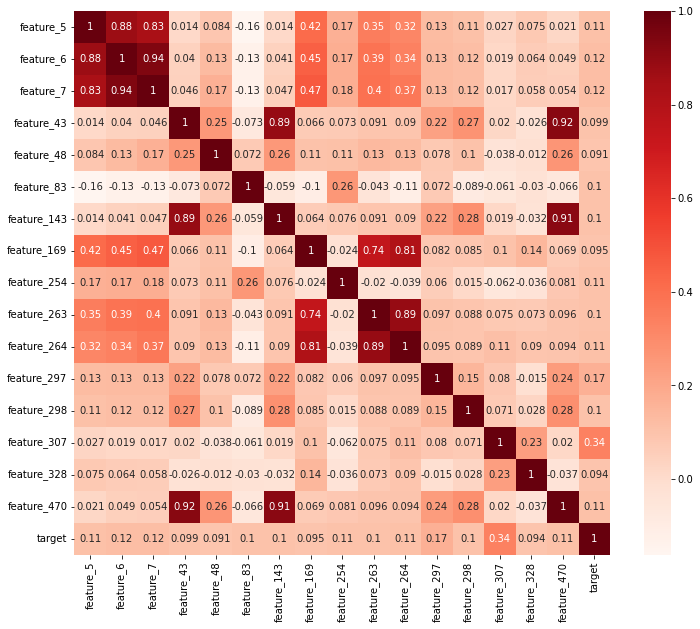

In [17]:
#using pearson's correlation 
new_train_data=train_y_data.join(train_x_data)
plt.figure(figsize=(12,10))
cor=new_train_data.corr(method ='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In the above figure we can see that our selected features all have almost similar correlation with the target, the only variant being feature 307, that has slightly more value. 

We can ignore the diagonal correlation values that is extremely high, this is because a feature will always have full correlation (value=1) with its own.

Before I forget, it is important to apply the same feature selection to the test dataset as well.

In [18]:
test_y_data=test_data[['feature_5', 'feature_6', 'feature_7', 'feature_43', 'feature_48',
                   'feature_83', 'feature_143', 'feature_169', 'feature_254', 'feature_263', 
                   'feature_264', 'feature_297', 'feature_298', 'feature_307', 'feature_328',
                   'feature_470']]

# Visualization

Some useful visualization

In [19]:
train_y_data

,feature_5,feature_6,feature_7,feature_43,feature_48,feature_83,feature_143,feature_169,feature_254,feature_263,feature_264,feature_297,feature_298,feature_307,feature_328,feature_470
0,37.560,54.756667,54.756667,0,2,NaN,0,0.0,0.0,0,0,2,0,0,0,0
1,NaN,NaN,NaN,2,2,NaN,2,0.0,0.0,0,0,2,0,1,0,2
2,NaN,NaN,NaN,2,0,NaN,2,0.0,0.0,0,0,2,0,0,0,2
3,NaN,NaN,NaN,0,0,NaN,0,0.0,0.0,0,0,2,0,1,0,0
4,37.480,37.480000,37.161333,0,0,NaN,0,0.0,0.0,0,0,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,NaN,NaN,NaN,0,2,NaN,0,0.0,0.0,0,0,2,0,0,0,0
69996,39.398,35.022000,45.645000,0,2,NaN,0,0.0,0.0,0,0,0,0,0,0,0
69997,NaN,NaN,NaN,0,2,NaN,1,0.0,0.0,0,0,0,0,1,1,1
69998,30.060,35.765000,35.765000,0,0,10.0,0,0.0,0.0,0,0,0,0,0,0,0


In [20]:
train_y_data[['feature_5', 'feature_6', 'feature_7', 'feature_43', 'feature_48',
                   'feature_83', 'feature_143', 'feature_169', 'feature_254', 'feature_263', 
                   'feature_264', 'feature_297', 'feature_298', 'feature_307', 'feature_328',
                   'feature_470']].isna().sum()

feature_5      44576
feature_6      43611
feature_7      42208
feature_43         0
feature_48         0
feature_83     68824
feature_143        0
feature_169        0
feature_254      411
feature_263        0
feature_264        0
feature_297        0
feature_298        0
feature_307        0
feature_328        0
feature_470        0
dtype: int64

Here, we can note that in feature_83 68,824 ot of 70,000 rows are null values. So we can go ahead and drop that column.

A reason of doubt is the fact that the same feature has a significant (in comparison to other features) correlation value.

Going back and doing some further analysis on the initial test dataset has led to the decision to NOT drop feature_83 as it is the only feature with high nan values that still has a high correlation value. 

In [21]:
train_y_data['feature_307'].values

array([0, 1, 0, ..., 1, 0, 0])

In [22]:
train_y_data.feature_307.unique()

array([0, 1])

We can note here that feature_307, which has a high correlation value to the target, is a binary categorcial variable.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


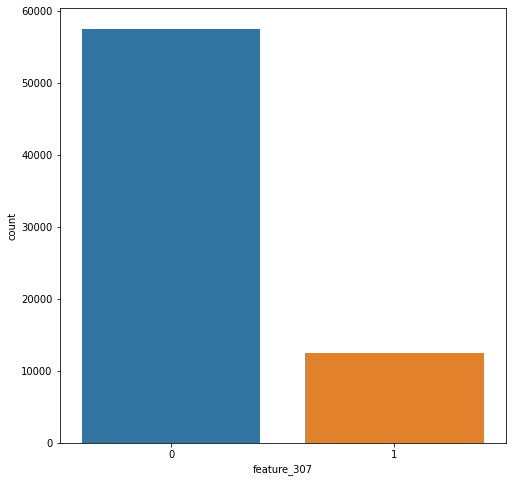

In [23]:
plt.figure(figsize=(8, 8))
sns.countplot(train_y_data['feature_307'])
plt.show()

The above graph shows that feature_307 has a significantly higher off value (0). 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


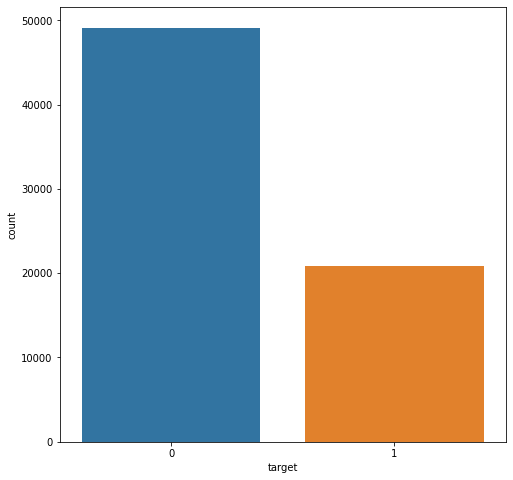

In [24]:
plt.figure(figsize=(8, 8))
sns.countplot(train_x_data)
plt.show()

In [25]:
train_x_data=pd.DataFrame(train_x_data)
train_y_data=pd.DataFrame(train_y_data)

In [26]:
train_y_data=train_y_data.replace(np.nan, 0)
train_y_data

,feature_5,feature_6,feature_7,feature_43,feature_48,feature_83,feature_143,feature_169,feature_254,feature_263,feature_264,feature_297,feature_298,feature_307,feature_328,feature_470
0,37.560,54.756667,54.756667,0,2,0.0,0,0.0,0.0,0,0,2,0,0,0,0
1,0.000,0.000000,0.000000,2,2,0.0,2,0.0,0.0,0,0,2,0,1,0,2
2,0.000,0.000000,0.000000,2,0,0.0,2,0.0,0.0,0,0,2,0,0,0,2
3,0.000,0.000000,0.000000,0,0,0.0,0,0.0,0.0,0,0,2,0,1,0,0
4,37.480,37.480000,37.161333,0,0,0.0,0,0.0,0.0,0,0,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.000,0.000000,0.000000,0,2,0.0,0,0.0,0.0,0,0,2,0,0,0,0
69996,39.398,35.022000,45.645000,0,2,0.0,0,0.0,0.0,0,0,0,0,0,0,0
69997,0.000,0.000000,0.000000,0,2,0.0,1,0.0,0.0,0,0,0,0,1,1,1
69998,30.060,35.765000,35.765000,0,0,10.0,0,0.0,0.0,0,0,0,0,0,0,0


# Modeling

In [27]:
#model 1 = logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_y_data, train_x_data)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='liblinear')

In [28]:
test_y_data=test_y_data.replace(np.nan, 0)
test_y_data

,feature_5,feature_6,feature_7,feature_43,feature_48,feature_83,feature_143,feature_169,feature_254,feature_263,feature_264,feature_297,feature_298,feature_307,feature_328,feature_470
0,37.638,36.361667,42.688333,0,2,0.0,0,0.0,0.0,0,0,2,0,0,0,0
1,32.540,32.540000,39.403333,2,2,0.0,2,0.0,0.0,0,0,0,0,0,0,2
2,0.000,0.000000,0.000000,0,2,0.0,0,0.0,0.0,0,0,0,0,0,0,0
3,0.000,0.000000,0.000000,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
4,0.000,0.000000,0.000000,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000,0.000000,0.000000,2,0,0.0,2,0.0,0.0,0,0,2,0,1,0,2
29996,0.000,0.000000,0.000000,0,0,0.0,0,0.0,0.0,0,0,2,0,0,0,0
29997,44.320,44.320000,43.959000,0,2,0.0,1,0.0,0.0,0,0,2,0,0,0,0
29998,45.660,44.223333,42.346667,0,0,0.0,0,0.0,0.0,0,0,2,0,1,0,0


In [29]:
y_pred=model.predict(test_y_data)
y_pred=pd.DataFrame(y_pred)
t_sub=pd.read_csv('../input/netflix-appetency/sample_submission.csv')
t_sub['target']=y_pred


In [30]:
#model 2 random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_y_data,train_x_data)

y_pred2=clf.predict(test_y_data)
y_pred2=pd.DataFrame(y_pred2)
rf=pd.read_csv('../input/netflix-appetency/sample_submission.csv')
rf['target']=y_pred2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# Submission

In [31]:
rf.to_csv('submission.csv', index=False)

# Evaluation

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
roc_auc_score(y_pred, model.predict_proba(test_y_data)[:, 1])

1.0